# Importing Libraries

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import seaborn as sns

In [21]:
train=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\traincsv.csv")
graph=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Mtech_project\\project _xl_file\\traincsv.csv")


In [22]:
train.head()

,taken date,date of departure,no.of_days_left,Airline,Aeroplane_ID,source,destination,Dep_Time,Arrival_Time,Duration,Cruidoilprice,no_of_competitors on root,price
0,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 191,New Delhi,Bengaluru,6:20,9:00,2h 40 m,56.2,5,3732
1,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 197,New Delhi,Bengaluru,16:35,19:25,2h 50m,56.2,5,3732
2,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8719,New Delhi,Bengaluru,18:25,21:15,2h 50m,56.2,5,3732
3,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 8905,New Delhi,Bengaluru,19:55,22:55,2h 30m,56.2,5,3732
4,11/1/2019,1/9/2020,69,SpiceJet Ltd,SG 143,New Delhi,Bengaluru,21:45,0:25,2h 40 m,56.2,5,4157


# DATA PREPARATION

In [23]:
train.drop(labels = 'date of departure', axis = 1, inplace = True)
train.drop(labels = 'no_of_competitors on root', axis = 1, inplace = True)
train.drop(labels = 'Airline', axis = 1, inplace = True)
train.drop(labels = 'source', axis = 1, inplace = True)
train.drop(labels = 'destination', axis = 1, inplace = True)
train.drop(labels = 'Aeroplane_ID', axis = 1, inplace = True)

In [24]:
train.head()

,taken date,no.of_days_left,Dep_Time,Arrival_Time,Duration,Cruidoilprice,price
0,11/1/2019,69,6:20,9:00,2h 40 m,56.2,3732
1,11/1/2019,69,16:35,19:25,2h 50m,56.2,3732
2,11/1/2019,69,18:25,21:15,2h 50m,56.2,3732
3,11/1/2019,69,19:55,22:55,2h 30m,56.2,3732
4,11/1/2019,69,21:45,0:25,2h 40 m,56.2,4157


In [25]:
train["isWeekend"] = ((pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.dayofweek) // 5 == 1).astype(int)#doubt
train["Day_of_Week"] = pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.day_name()
train["Day_Of_Journey"] = pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.day
train["Month_of_Journey"] = pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.month

In [26]:
train["Day_of_Week"] = pd.to_datetime(train["taken date"], format = '%m/%d/%Y').dt.day_name()

In [27]:
train.head()

,taken date,no.of_days_left,Dep_Time,Arrival_Time,Duration,Cruidoilprice,price,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,11/1/2019,69,6:20,9:00,2h 40 m,56.2,3732,0,Friday,1,11
1,11/1/2019,69,16:35,19:25,2h 50m,56.2,3732,0,Friday,1,11
2,11/1/2019,69,18:25,21:15,2h 50m,56.2,3732,0,Friday,1,11
3,11/1/2019,69,19:55,22:55,2h 30m,56.2,3732,0,Friday,1,11
4,11/1/2019,69,21:45,0:25,2h 40 m,56.2,4157,0,Friday,1,11


In [28]:
train.head()

,taken date,no.of_days_left,Dep_Time,Arrival_Time,Duration,Cruidoilprice,price,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,11/1/2019,69,6:20,9:00,2h 40 m,56.2,3732,0,Friday,1,11
1,11/1/2019,69,16:35,19:25,2h 50m,56.2,3732,0,Friday,1,11
2,11/1/2019,69,18:25,21:15,2h 50m,56.2,3732,0,Friday,1,11
3,11/1/2019,69,19:55,22:55,2h 30m,56.2,3732,0,Friday,1,11
4,11/1/2019,69,21:45,0:25,2h 40 m,56.2,4157,0,Friday,1,11


In [29]:
train.drop(labels = 'taken date', axis = 1, inplace = True)

In [30]:
train.head()

,no.of_days_left,Dep_Time,Arrival_Time,Duration,Cruidoilprice,price,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,69,6:20,9:00,2h 40 m,56.2,3732,0,Friday,1,11
1,69,16:35,19:25,2h 50m,56.2,3732,0,Friday,1,11
2,69,18:25,21:15,2h 50m,56.2,3732,0,Friday,1,11
3,69,19:55,22:55,2h 30m,56.2,3732,0,Friday,1,11
4,69,21:45,0:25,2h 40 m,56.2,4157,0,Friday,1,11


In [31]:
# cleaning duration column in train dataset
duration = list(train["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
train["Duration_minutes"] = dur_minutes
train.drop(["Duration"], axis=1, inplace = True)

In [32]:
#Cleaning Departure and Arrival Times
# Training Set
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute
train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)


In [33]:
train.head()

,no.of_days_left,Cruidoilprice,price,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,69,56.2,3732,0,Friday,1,11,124,6,20,9,0
1,69,56.2,3732,0,Friday,1,11,170,16,35,19,25
2,69,56.2,3732,0,Friday,1,11,170,18,25,21,15
3,69,56.2,3732,0,Friday,1,11,150,19,55,22,55
4,69,56.2,4157,0,Friday,1,11,124,21,45,0,25


In [34]:
train.Day_of_Week.replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], [1,2,3,4,5,6,7], inplace=True)
train["Day_of_Week"] = train["Day_of_Week"].astype(int)

In [35]:
bins = [-1, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['late evening','magical hours','early morning','morning','early afternoon','afternoon','early evening','evening']
train['part_of_day'] = pd.cut(train['Depart_Time_Hour'], bins=bins, labels=labels)

In [36]:
train.part_of_day.replace(['late evening','magical hours','early morning','morning','early afternoon','afternoon','early evening','evening'], [6,7, 0,1, 2, 3, 4,5], inplace=True)

In [37]:
train.drop(labels = 'isWeekend', axis = 1, inplace = True)

In [38]:
train.head()

,no.of_days_left,Cruidoilprice,price,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,part_of_day
0,69,56.2,3732,5,1,11,124,6,20,9,0,7
1,69,56.2,3732,5,1,11,170,16,35,19,25,3
2,69,56.2,3732,5,1,11,170,18,25,21,15,3
3,69,56.2,3732,5,1,11,150,19,55,22,55,4
4,69,56.2,4157,5,1,11,124,21,45,0,25,4


In [39]:
train.describe()

,no.of_days_left,Cruidoilprice,price,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,part_of_day
count,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.00000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000
mean,34.720892,58.984019,5323.726547,3.997671,14.459415,10.260812,175.30173,12.444777,33.531271,13.779108,32.586494,3.666999
std,19.963184,2.211107,1307.806236,2.013018,9.079801,3.437850,29.95276,6.234954,17.772275,6.921507,17.534516,2.279305
min,1.000000,54.670000,3199.000000,1.000000,1.000000,1.000000,124.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,57.150000,4224.000000,2.000000,6.000000,11.000000,165.00000,6.000000,20.000000,9.000000,15.000000,2.000000
50%,35.000000,58.580000,5241.000000,4.000000,14.000000,11.000000,170.00000,14.000000,40.000000,15.000000,35.000000,3.000000
75%,52.000000,60.910000,5886.000000,6.000000,22.000000,12.000000,175.00000,18.000000,50.000000,20.000000,50.000000,6.000000
max,69.000000,63.270000,15158.000000,7.000000,31.000000,12.000000,275.00000,22.000000,55.000000,23.000000,55.000000,7.000000


In [40]:
print(train.skew())

no.of_days_left        0.018406
Cruidoilprice          0.179105
price                  1.383795
Day_of_Week            0.002452
Day_Of_Journey         0.187742
Month_of_Journey      -2.267493
Duration_minutes       2.071282
Depart_Time_Hour      -0.191245
Depart_Time_Minutes   -0.462148
Arr_Time_Hour         -0.361671
Arr_Time_Minutes      -0.357219
part_of_day            0.080486
dtype: float64


In [41]:
print(train.kurt())

no.of_days_left       -1.206129
Cruidoilprice         -0.937043
price                  4.235692
Day_of_Week           -1.271491
Day_Of_Journey        -1.254330
Month_of_Journey       3.313293
Duration_minutes       4.451725
Depart_Time_Hour      -1.335098
Depart_Time_Minutes   -1.082821
Arr_Time_Hour         -1.022935
Arr_Time_Minutes      -1.099243
part_of_day           -1.034272
dtype: float64


# REMOVING OUTLIERS

In [42]:

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train))
print(z)


[[1.71740195 1.25931594 1.21729911 ... 0.69058708 1.85872915 1.4625316 ]
 [1.71740195 1.25931594 1.21729911 ... 0.75442529 0.43273256 0.29268149]
 [1.71740195 1.25931594 1.21729911 ... 1.04342776 1.0031312  0.29268149]
 ...
 [1.68943498 0.28315483 2.54611675 ... 0.60992405 0.99326402 0.29268149]
 [1.68943498 0.28315483 1.98401339 ... 0.89892653 0.43273256 0.29268149]
 [1.68943498 0.28315483 1.19248008 ... 0.32092158 0.99326402 0.73148476]]


In [43]:
threshold = 3
print(np.where(z > 3))

(array([  13,   37,   56,   80,   99,  123,  142,  166,  185,  209,  228,
        252,  271,  314,  357,  400,  443,  486,  529,  572,  615,  639,
        658,  682,  701,  725,  744,  787,  830,  873,  916,  959, 1002,
       1045, 1088, 1131, 1174, 1217, 1260, 1303, 1327, 1346, 1370, 1389,
       1413, 1432, 1456, 1475, 1499, 1518, 1542, 1561, 1585, 1604, 1628,
       1647, 1671, 1690, 1715, 1734, 1759, 1778, 1803, 1822, 1866, 1910,
       1954, 1998, 2042, 2086, 2130, 2174, 2218, 2262, 2306, 2350, 2394,
       2438, 2482, 2526, 2526, 2571, 2571, 2616, 2616, 2661, 2661, 2706,
       2751, 2796, 2841, 2886, 2892, 2930, 2936, 2974, 2980, 2981, 2999],
      dtype=int64), array([6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2,
       6, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 2, 6, 2, 6, 6,
       6, 6, 6, 6, 2, 6, 2, 6

In [44]:
threshold = 3
print(np.where(z < 3))

(array([   0,    0,    0, ..., 3005, 3005, 3005], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))


In [45]:
z.shape

(3006, 12)

In [46]:
train = train[(z < 3).all(axis=1)]

In [47]:
train.shape

(2911, 12)

In [48]:
print(train.skew())

no.of_days_left        0.021153
Cruidoilprice          0.173843
price                  0.572890
Day_of_Week            0.000434
Day_Of_Journey         0.176422
Month_of_Journey      -2.275479
Duration_minutes       2.223121
Depart_Time_Hour      -0.249753
Depart_Time_Minutes   -0.477899
Arr_Time_Hour         -0.379174
Arr_Time_Minutes      -0.390937
part_of_day            0.099173
dtype: float64


In [49]:
print(train.kurt())          # we can see that kurtsis coeff reduces significantly after removing outliers

no.of_days_left       -1.209930
Cruidoilprice         -0.944509
price                 -0.311846
Day_of_Week           -1.270996
Day_Of_Journey        -1.258574
Month_of_Journey       3.351223
Duration_minutes       6.870356
Depart_Time_Hour      -1.302287
Depart_Time_Minutes   -1.101142
Arr_Time_Hour         -1.056950
Arr_Time_Minutes      -1.029949
part_of_day           -0.969552
dtype: float64


In [50]:
#train = train[(z > 3).all(axis=1)]

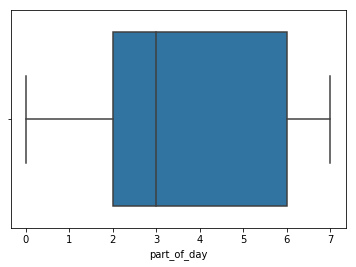

In [51]:
sns.boxplot(x=train["part_of_day"])

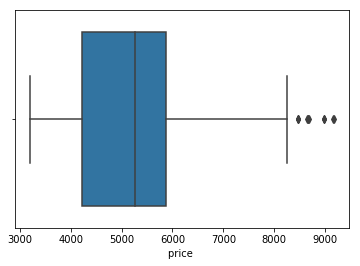

In [52]:
sns.boxplot(x=train["price "])

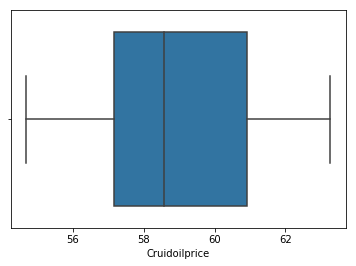

In [53]:
sns.boxplot(x=train["Cruidoilprice"])

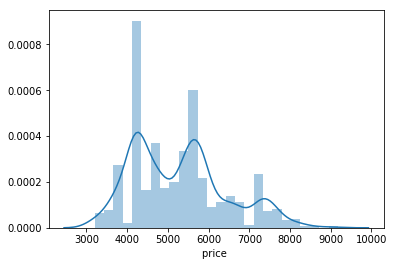

In [54]:
sns.distplot(train['price '])

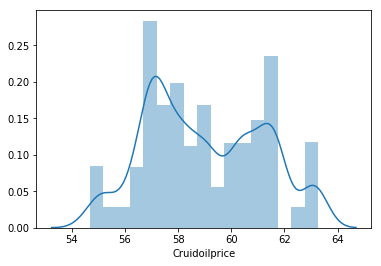

In [55]:
sns.distplot(train['Cruidoilprice'])

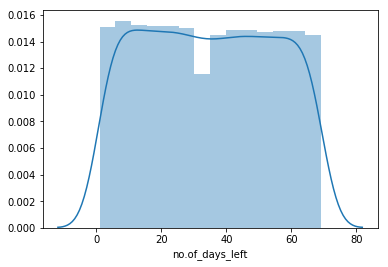

In [56]:
sns.distplot(train['no.of_days_left'])

# DATA NORMALIZATION

In [57]:
#df=((train-train.min())/(train.max()-train.min()))*100
df=(((train-train.min())/(train.max()-train.min()))*(9000-3000))+3000

In [58]:
df.head()

,no.of_days_left,Cruidoilprice,price,Day_of_Week,Day_Of_Journey,Month_of_Journey,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,part_of_day
0,9000.0,4067.44186,3534.872052,7000.0,3000.0,8454.545455,3000.000000,4636.363636,5181.818182,5347.826087,3000.000000,9000.000000
1,9000.0,4067.44186,3534.872052,7000.0,3000.0,8454.545455,4957.446809,7363.636364,6818.181818,7956.521739,5727.272727,5571.428571
2,9000.0,4067.44186,3534.872052,7000.0,3000.0,8454.545455,4957.446809,7909.090909,5727.272727,8478.260870,4636.363636,5571.428571
3,9000.0,4067.44186,3534.872052,7000.0,3000.0,8454.545455,4106.382979,8181.818182,9000.000000,8739.130435,9000.000000,6428.571429
4,9000.0,4067.44186,3961.364777,7000.0,3000.0,8454.545455,3000.000000,8727.272727,7909.090909,3000.000000,5727.272727,6428.571429


In [59]:
train['price '].min()

3199

In [60]:
train['price '].max()

9178

In [61]:
train['price '].mean()

5275.939883201649

# Regression Based Machine Learning Algorithms


# 1. RANDOM FOREST REGRESSION

In [62]:
df.columns

Index(['no.of_days_left', 'Cruidoilprice', 'price ', 'Day_of_Week',
       'Day_Of_Journey', 'Month_of_Journey', 'Duration_minutes',
       'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour',
       'Arr_Time_Minutes', 'part_of_day'],
      dtype='object')

In [63]:
X=df[['no.of_days_left', 'Cruidoilprice','Day_of_Week','Day_Of_Journey', 'Month_of_Journey', 'Duration_minutes',
      'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour',
       'Arr_Time_Minutes', 'part_of_day']]

In [64]:
y=df['price ']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [67]:
 from sklearn.ensemble import RandomForestRegressor 

In [68]:
rf = RandomForestRegressor(random_state=42)

In [69]:
rf.fit(X_train, y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [70]:
predictions= rf.predict(X_test)

In [71]:
predictions[0:5]

array([6807.42599097, 4712.49372805, 4755.84545911, 7234.82187657,
       4027.59658806])

In [72]:
y_test[0:5]

2982    7071.249373
2490    3000.000000
143     4822.378324
2409    7403.411942
676     4027.596588
Name: price , dtype: float64

In [73]:
rf.score(X,y)

0.9463755806603733

In [74]:
from sklearn import metrics

In [75]:
metrics.mean_absolute_error(y_test,predictions)

201.72500748327306

In [76]:
metrics.mean_squared_error(y_test,predictions)

141879.86636667585

In [77]:
metrics.mean_squared_log_error(y_test,predictions)

0.005794008578159771

In [78]:
from sklearn.metrics import statistics

ImportError: cannot import name 'statistics' from 'sklearn.metrics' (C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

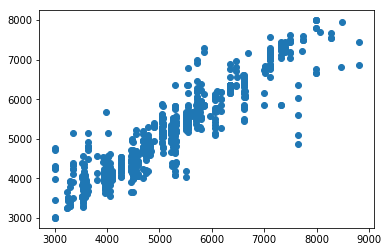

In [79]:
plt.scatter(y_test,predictions)

In [80]:
rf.feature_importances_





array([0.4082536 , 0.03064495, 0.01081486, 0.04873581, 0.00629792,
       0.16081635, 0.03574492, 0.06875406, 0.11730351, 0.05629422,
       0.05633982])

In [81]:
rf.predict([[68,54,7,2,12,150,16,35,19,25,4]])

array([6042.84997491])

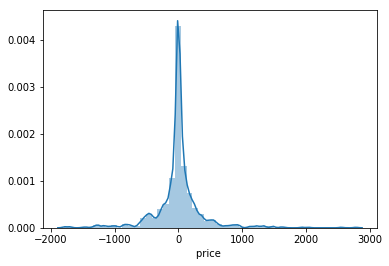

In [82]:
sns.distplot((y_test-predictions))

In [83]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                     importance
no.of_days_left        0.408254
Duration_minutes       0.160816
Arr_Time_Hour          0.117304
Depart_Time_Minutes    0.068754
part_of_day            0.056340
Arr_Time_Minutes       0.056294
Day_Of_Journey         0.048736
Depart_Time_Hour       0.035745
Cruidoilprice          0.030645
Day_of_Week            0.010815
Month_of_Journey       0.006298


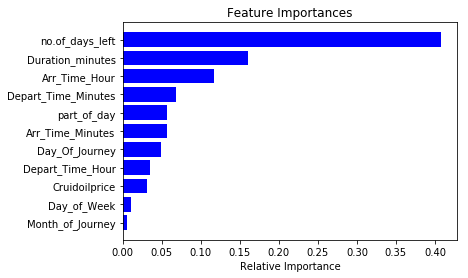

In [84]:
plotFeatureImportances(rf)

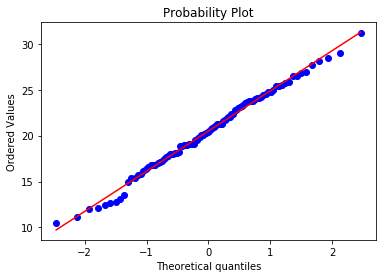

In [85]:
import numpy as np 
import pylab 
import scipy.stats as stats

df = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(df, dist="norm", plot=pylab)
pylab.show()

# 2.LINEAR REGRESSION

In [69]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)


In [70]:
predictions

array([6933.7303259 , 5443.88647253, 4173.43519059, ..., 4894.62634162,
       6690.14497499, 4478.59846409])

In [71]:
lm.score(X,y)

0.4242864821542446

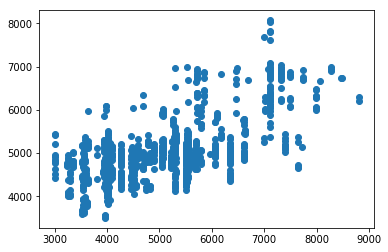

In [72]:
plt.scatter(y_test,predictions)

In [73]:
from sklearn import metrics



In [74]:
metrics.mean_absolute_error(y_test,predictions)

703.3366194486766

In [75]:
metrics.mean_squared_error(y_test,predictions)

765905.3058723888

In [76]:
metrics.mean_squared_log_error(y_test,predictions)

0.03059806064942259

In [77]:
print(lm.intercept_)

7225.841035187053


In [78]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
no.of_days_left,-0.114191
Cruidoilprice,0.014682
Day_of_Week,0.017775
Day_Of_Journey,0.022751
Month_of_Journey,-0.257458
Duration_minutes,0.238509
Depart_Time_Hour,-0.070142
Depart_Time_Minutes,-0.029300
Arr_Time_Hour,0.097611
Arr_Time_Minutes,-0.035935


In [79]:
# check the coefficient values such as m1,m2,m3
lm.coef_

array([-0.11419063,  0.01468178,  0.01777481,  0.02275096, -0.25745802,
        0.23850908, -0.07014166, -0.02929977,  0.0976108 , -0.03593494,
       -0.11133161])

In [80]:
lm.predict([[68,54,7,2,12,150,16,35,19,25,4]])

array([7250.08882653])

In [81]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test,predictions)

SyntaxError: unexpected EOF while parsing (<ipython-input-81-2c074723f512>, line 2)

#  3.LASSO REGRESSION

In [82]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [83]:
lm.score(X,y)

0.42428650002934104

In [84]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [85]:
lm.score(X,y)

0.4242864821490804

# 4.ElasticNet Regresser 

In [86]:
from sklearn.linear_model import ElasticNet
lm=ElasticNet()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [87]:
lm.score(X,y)

0.4242864865960944

# 5.BayesianRidge

In [88]:
from sklearn.linear_model import BayesianRidge
lm=BayesianRidge()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [89]:
lm.score(X,y)

0.42395792613061567

# 6.XGBRegressor

In [90]:
from xgboost import XGBRegressor



In [91]:
rf = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)

In [92]:
rf.fit(X_train,y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1.7817, missing=None,
       n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=42, reg_alpha=0.464, reg_lambda=0.8571,
       scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
       verbosity=1)

In [93]:
rf.score(X,y)

0.8822631263068198

# 7.GradientBoostingRegressor 

In [94]:
from sklearn.ensemble import GradientBoostingRegressor 

In [95]:
rf = GradientBoostingRegressor()

In [96]:
rf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
rf.score(X,y)

0.7814033859793127

In [98]:
rf.feature_importances_

array([0.39377385, 0.00604649, 0.00366215, 0.02871979, 0.00733569,
       0.22605916, 0.03129956, 0.09647844, 0.10489988, 0.04372819,
       0.0579968 ])

In [99]:
rf.predict([[40,54,7,2,12,150,16,35,19,25,4]])

array([6190.98620497])

# 8.ExtraTreesRegressor

In [100]:
from sklearn.ensemble import ExtraTreesRegressor

In [101]:
 rf = ExtraTreesRegressor()

In [102]:
rf.fit(X_train,y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [103]:
rf.score(X,y)

0.9635728905468327

In [104]:
predictions=rf.predict(X_test)

In [105]:
predictions[0:5]

array([8061.81635725, 3769.89463121, 4789.36276969, 7216.85900652,
       4027.59658806])

In [106]:
y_test[0:5]

2982    7071.249373
2490    3000.000000
143     4822.378324
2409    7403.411942
676     4027.596588
Name: price , dtype: float64

In [122]:
rf.predict([[68,54,7,2,12,150,16,35,19,25,4]])

array([5064.41050104])

# cross validation for extratreeregressor

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
k1=cross_val_score(ExtraTreesRegressor(), X, y,cv=3)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [114]:
k1

array([ 0.41299544,  0.59839813, -0.15541893])

k1.mean()

In [115]:
k1.mean()

0.28532488041693793

In [116]:
cross_val_score(ExtraTreesRegressor(), X, y,cv=10)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

array([ 0.84317131,  0.91317757,  0.76467141,  0.68764939,  0.68484339,
        0.80198971,  0.67701191,  0.715497  ,  0.13100098, -2.31396045])

In [117]:
k=cross_val_score(ExtraTreesRegressor(), X, y,cv=10)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [118]:
k

array([ 0.82810066,  0.91876375,  0.76849815,  0.72112835,  0.69870123,
        0.82299733,  0.68916647,  0.69919791,  0.06397293, -2.59304624])

In [119]:
k.mean()

0.3617480549375047

# cross validation Random forest regression

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
k2=cross_val_score(RandomForestRegressor(random_state=42), X, y,cv=3)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [118]:

k2

array([ 0.40737227,  0.65549355, -0.10894577])

In [119]:
k2.mean()

0.31797334975841524

In [120]:
k3=cross_val_score(RandomForestRegressor(random_state=42), X, y,cv=10)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [121]:
k3

array([ 0.74619788,  0.90491969,  0.79185731,  0.65816536,  0.69623021,
        0.81039141,  0.60797339,  0.65007267,  0.35065281, -1.99958915])

In [122]:
k3.mean()

0.42168715851867